<a href="https://colab.research.google.com/github/rareTYPErelease/Supervised-Learning-Decision-tree/blob/main/Election_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
social_media_data = pd.read_csv('/content/Instagram data.csv')
voter_registration_data = pd.read_csv('/content/2020 November General Election - Turnout Rates.csv')

# Merge the datasets based on common identifiers
merged_data = pd.merge(social_media_data, voter_registration_data, on='user_id', how='inner')

# Drop irrelevant columns and handle missing values
merged_data.drop(['user_id', 'Comments'], axis=1, inplace=True)
merged_data.replace({',': '', '%': ''}, regex=True, inplace=True)
merged_data = merged_data.astype(float)


In [27]:
# Calculate correlations
correlation_matrix = merged_data.corr()

# Split the data into features (X) and target variable (y)
X = merged_data.drop('Likes', axis=1)
y = merged_data['Likes']

# Handle missing values with imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [28]:
# Initialize and train a Random Forest regressor
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 844.66355
Mean Absolute Error: 26.755000000000003
R-squared: 0.10064438677047982


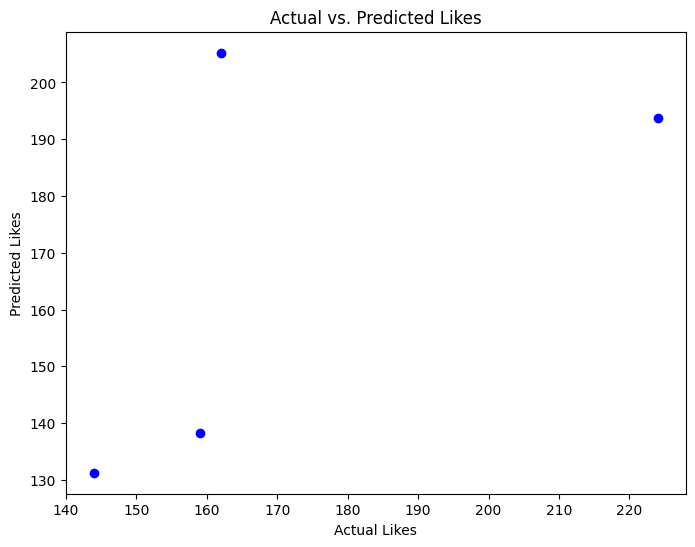

In [29]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Actual vs. Predicted Likes')
plt.show()

# Calculate residuals
residuals = y_test - y_pred


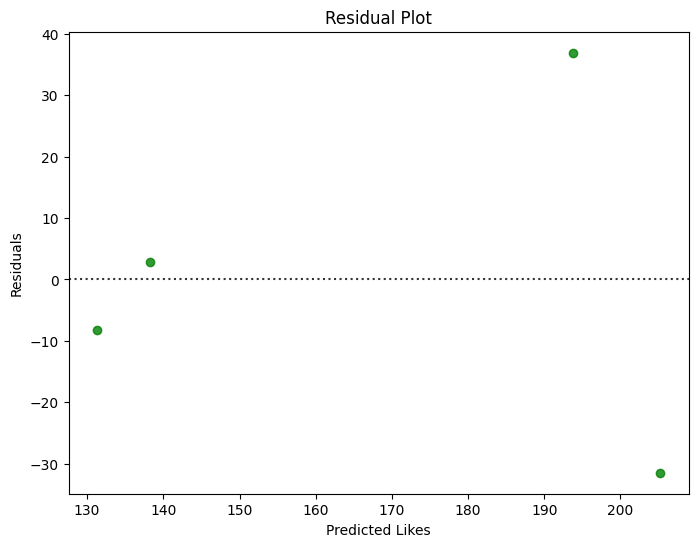

In [30]:
# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='green')
plt.xlabel('Predicted Likes')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


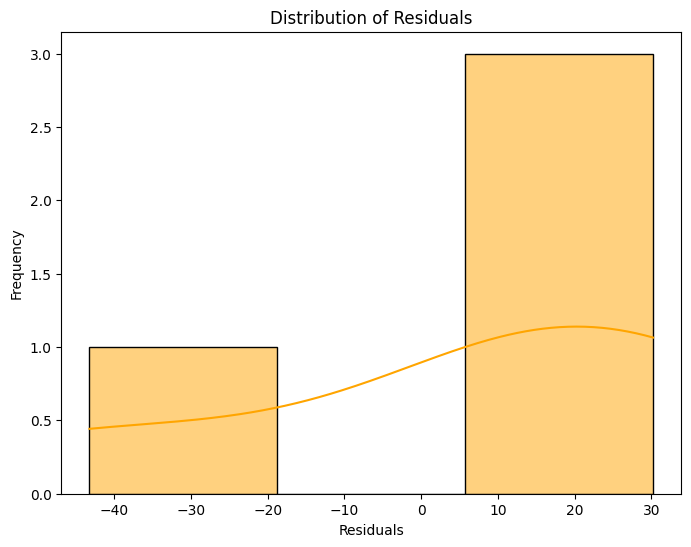

In [31]:
# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

<ipython-input-32-a1c3f62ac6d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')


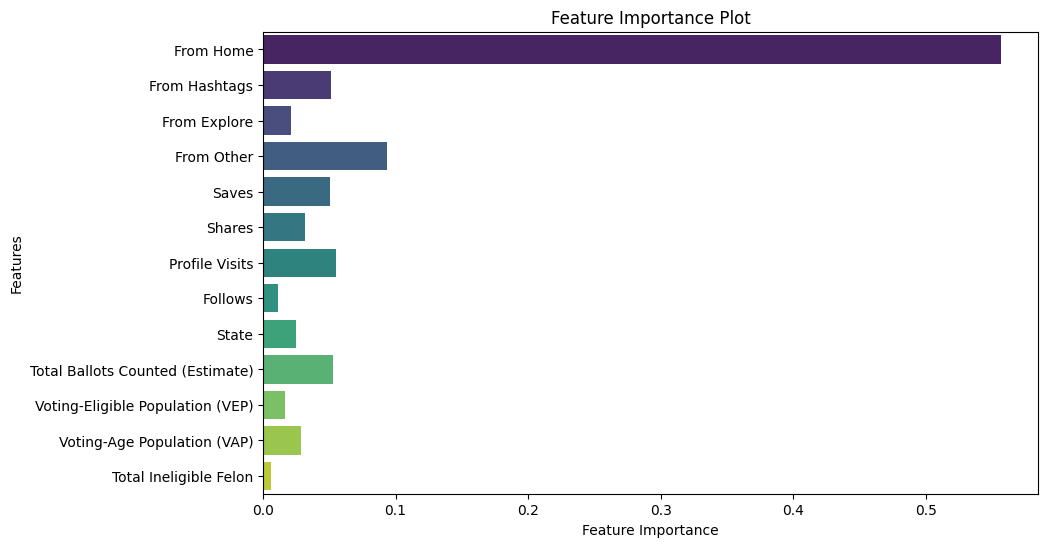

In [32]:
# Feature Importance plot
feature_importance = clf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

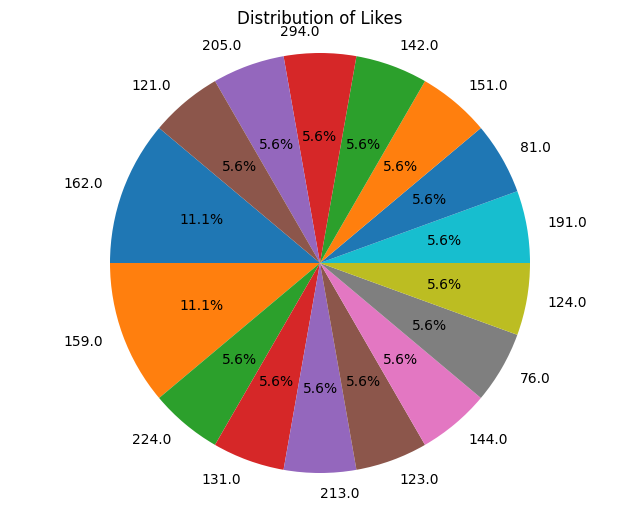

In [33]:
# Pie chart showing distribution of Likes
plt.figure(figsize=(8, 6))
likes_distribution = merged_data['Likes'].value_counts()
plt.pie(likes_distribution, labels=likes_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Likes')
plt.show()



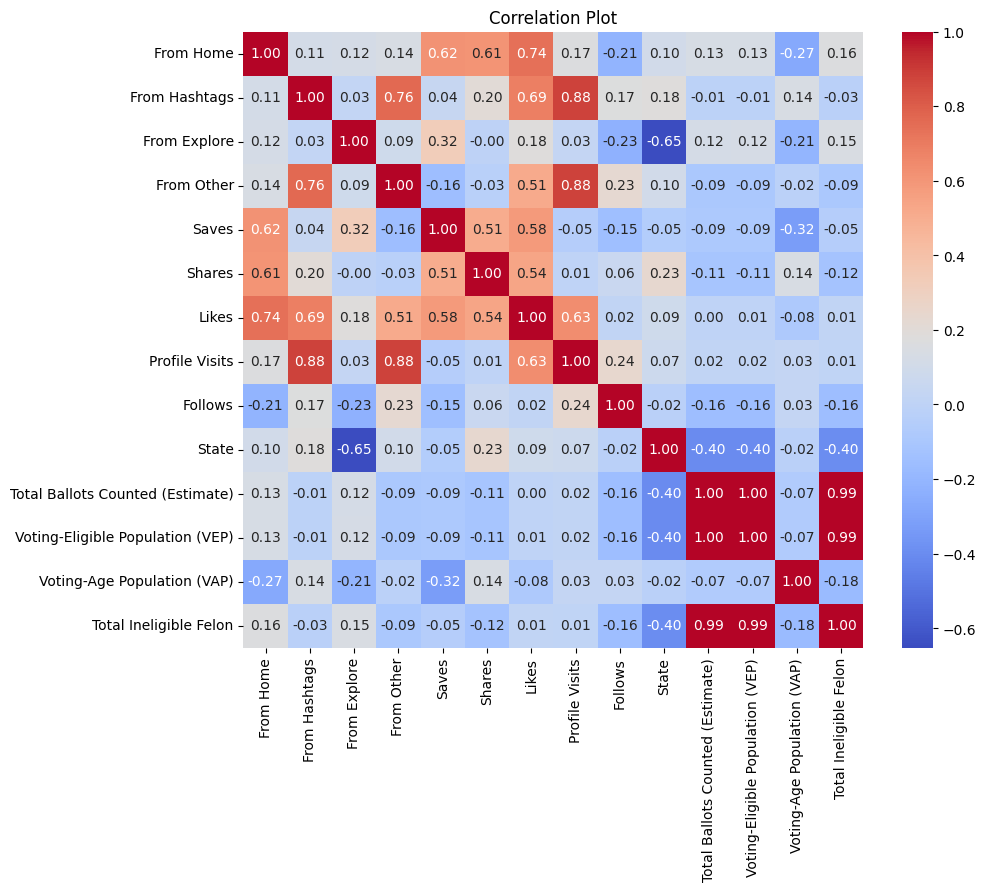

In [34]:
# Correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

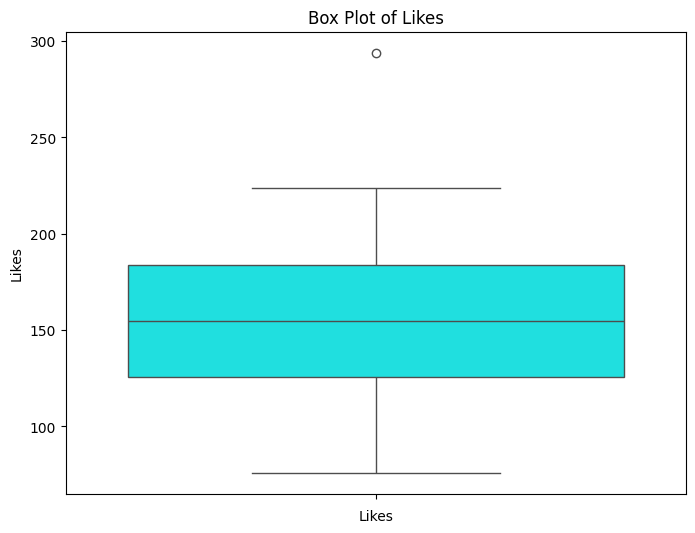

In [35]:
# Box plot of Likes
plt.figure(figsize=(8, 6))
sns.boxplot(y='Likes', data=merged_data, color='cyan')
plt.xlabel('Likes')
plt.title('Box Plot of Likes')
plt.show()